# Verlauf einer Epidemie

Der verlauf von Epidemien lässt sich auch mit Hilfe von Differentialgleichungen beschreiben. Dazu gibt es das sogenannte SIR-Modell. Dieses Modell wird ausführlich in dem Video

[Mehr "Corona-Mathematik": Wie Epidemien modelliert werden beschrieben.](https://www.youtube.com/watch?v=YGeX2Q7D5BU)

Kurz zusammengefasst betrachtet dieses Modell eine Population, die in drei unterschiedliche Gruppen unterteilt wird:

- $S(t)$ ist die Menge an für die Krankheit anfälligen Personen (*susceptible*)
- $I(t)$ ist die Menge an infizierten Personen (*infected*)
- $R(t)$ ist die Menge an genesenen Personen (*recovered*)

Die Änderungsrate der anfälligen Individuen $\dot{S}(t)$ hängt davon ab wie viele Individuen anfällig sind ($S(t)$), wie viele infiziert sind ($I(t)$) und einem Ansteckungsfaktor $\alpha$. Die Änderungsrate an genesenen Individuen hängt davon ab wie viele Individuen derzeit krank sind ($I(t)$) und einem Genesungsfaktor $\beta$, der Auskunft über die mittlere Krankheitsdauer gibt. Die Änderungsrate an infizierten Individuen ($\dot{I}(t)$) entspricht der der Differenz aus den Änderungsraten von anfälligen und genesenen Individuen. Somit wird das SIR-Modell über folgendes Differentialgleichungssystem beschrieben.

$$\dot{S}(t) = -\alpha \cdot S(t) \cdot I(t)$$
$$\dot{I}(t) = \alpha \cdot S(t) \cdot I(t) - \beta \cdot I(t)$$
$$\dot{R}(t) = \beta \cdot I(t)$$

Simulieren Sie eine Epidemie mit $\alpha = 0,0001 \frac{\text{Ansteckungen/Individuum}}{\text{Tag}}$ und einer Genesungsrate $\beta = \frac{1}{14} \frac{1}{\text{Tag}}$. Die Population bestehet zu Beginn der Epidemie aus $S(t = 0) = 10000$ anfälligen und $I(t = 0) = 10$ infizierten Individuen. Berechnen Sie den Zeitverlauf der drei Gruppen $S(t)$, $I(t)$ und $R(t)$, beginnend mit $t = 0$ Tage bis $t = 50$ Tage

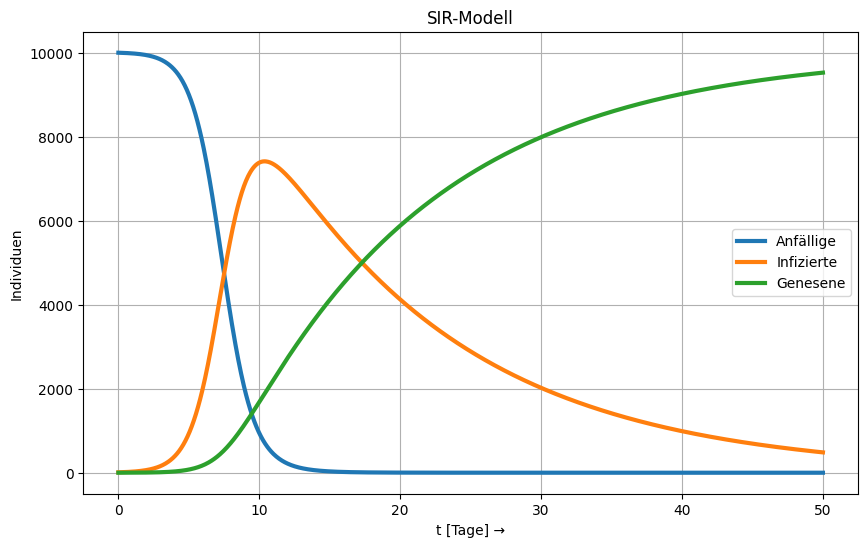

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameter definieren
S0 = 10000
I0 = 10
alpha = 0.0001
beta = 1/14

# SIR-Modell definieren
def xpunkt_sir(t, x, alpha, beta):
    S = x[0]
    I = x[1]
    
    dSdt = -alpha * S * I
    dIdt = alpha * S * I - beta * I
    dRdt = beta * I
    
    return [dSdt, dIdt, dRdt]

# Zeitspanne
t_span = [0, 50]
# Anfangsbedingung
x0 = [S0, I0, 0]

# Differentialgleichung lösen
solution = solve_ivp(
    lambda t, x: xpunkt_sir(t, x, alpha, beta),
    t_span,
    x0,
    method='RK45',
    t_eval=np.linspace(t_span[0], t_span[1], 1000)
)

t = solution.t
S = solution.y[0]
I = solution.y[1]
R = solution.y[2]

# Ergebnisse plotten
plt.figure(figsize=(10, 6))
plt.plot(t, S, linewidth=3, label='Anfällige')
plt.plot(t, I, linewidth=3, label='Infizierte')
plt.plot(t, R, linewidth=3, label='Genesene')
plt.grid(True)
plt.xlabel('t [Tage] →')
plt.ylabel('Individuen')
plt.legend()
plt.title('SIR-Modell')
plt.show()